<b>As a Data Scientist you have been given a task from "Car Dekho" company to create a model to estimate the price of a car using some features .

<img src = "cars1.jpg" >

# About the dataset

This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset are as follows:
<ul>
<li>name : This column should be filled with the name of the car.
<li>year : This column should be filled with the year in which the car was bought.
<li>selling_price : This column should be filled with the price the owner wants to sell the car at.
<li>km_driven : This is the distance completed by the car in km.
<li>fuel : Fuel type of the car.
<li>seller_type : Defines whether the seller is a dealer or an individual.
<li>transmission : Defines whether the car is manual or automatic.
<li>Owner : Defines the number of owners the car has previously had.

# Step 1 : Import the libraries 

import all the important libraries needed initially

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import  metrics

In [7]:
car = pd.read_csv("car data.csv")

In [8]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
%%timeit
car.rename({'Year': 'X'}, axis=1, inplace=True)

313 µs ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
b = 013

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-16-d9d8309be45d>, line 1)

In [21]:
car.Year = car.Year.astype(str)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    object 
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 21.3+ KB


# Step 2 : EDA 

In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
car['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Name', ylabel='count'>

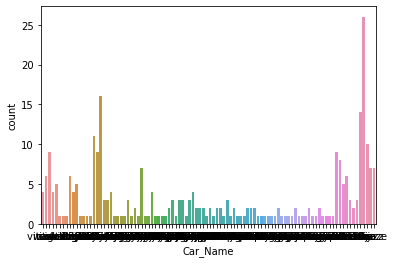

In [13]:
sns.countplot(car['Car_Name'])

In [14]:
car['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

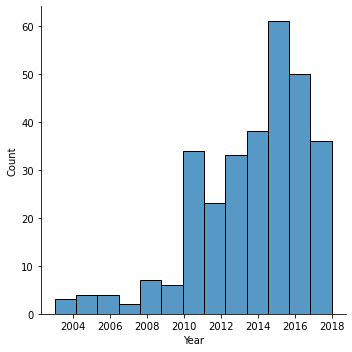

In [17]:
sns.displot(car.Year)

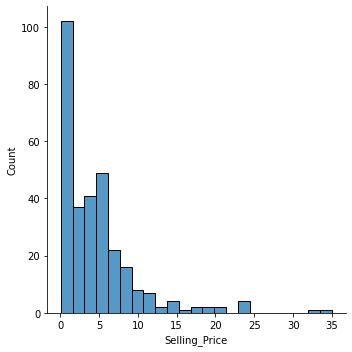

In [18]:
sns.displot(car.Selling_Price)

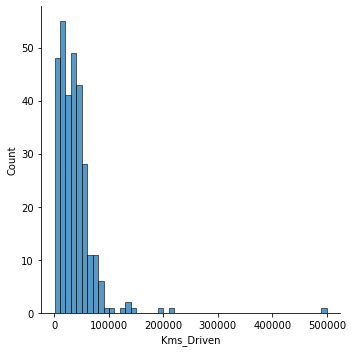

In [19]:
sns.displot(car.Kms_Driven)

In [22]:
car[car['Kms_Driven'] >100000]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
77,corolla,2004,1.50,12.35,135154,Petrol,Dealer,Automatic,0
84,innova,2005,3.49,13.46,197176,Diesel,Dealer,Manual,0
85,camry,2006,2.50,23.73,142000,Petrol,Individual,Automatic,3
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [16]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [27]:
car['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

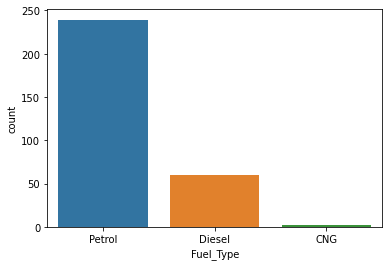

In [23]:
sns.countplot(car.Fuel_Type)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

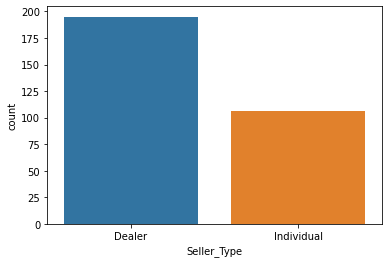

In [24]:
sns.countplot(car.Seller_Type)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

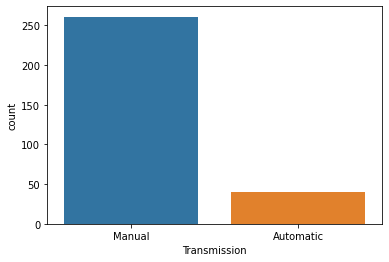

In [25]:
sns.countplot(car.Transmission)

# Step 3 : Enocoding / Standarization / Normalization if needed 

In [28]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [33]:
car.replace({'Fuel_Type' :{'Petrol':0 ,'Diesel':1 ,'CNG':2}},inplace = True)

In [34]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0


In [36]:
car.replace({'Seller_Type' :{'Dealer':0 ,'Individual':1 }},inplace = True)

In [39]:
car.replace({'Transmission' :{'Manual':0 ,'Automatic':1 }},inplace = True)

In [41]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


# Step 4 : Split the dataset

In [43]:
X = car.drop(['Car_Name','Selling_Price'],axis=1)

In [44]:
y =car.Selling_Price

In [45]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [46]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 6 : Train the model 

In [74]:
Lr = LinearRegression()

In [75]:
Lr.fit(X_train,y_train)

LinearRegression()

# Step 7 : Prediction 

In [76]:
y_test_pred = Lr.predict(X_test)
y_train_pred = Lr.predict(X_train)

# Step 8 : Evaluation

In [77]:
# Training set
print(metrics.r2_score(y_train ,y_train_pred))
print(metrics.mean_absolute_error(y_train ,y_train_pred))
print(metrics.mean_squared_error(y_train ,y_train_pred))
print(np.sqrt(metrics.mean_squared_error(y_train ,y_train_pred)))

0.8838169193709796
1.199852024214738
3.207327351154105
1.7909012678408893


Text(0, 0.5, 'predicted value')

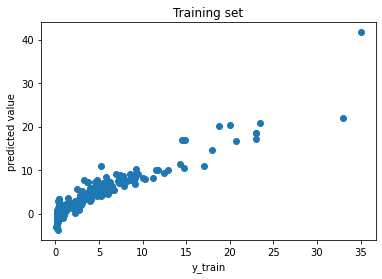

In [78]:
plt.scatter(y_train,y_train_pred)
plt.title("Training set")
plt.xlabel("y_train")
plt.ylabel("predicted value")

In [79]:
# Test set
print(metrics.r2_score(y_test ,y_test_pred))
print(metrics.mean_absolute_error(y_test ,y_test_pred))
print(metrics.mean_squared_error(y_test ,y_test_pred))
print(np.sqrt(metrics.mean_squared_error(y_test ,y_test_pred)))

0.8401532365377784
1.2671998472916814
2.935823428932481
1.713424474242294


Text(0, 0.5, 'predicted value')

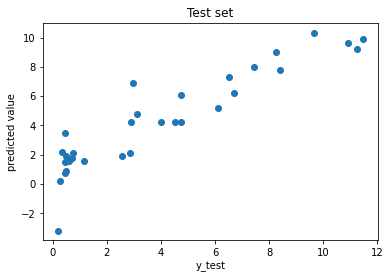

In [72]:
plt.scatter(y_test,y_test_pred)
plt.title("Test set")
plt.xlabel("y_test")
plt.ylabel("predicted value")

# Results :
If you have followed the above steps nicely you should be getting a good model with some decent results , you can compare your results with the below one . Results may vary but should be nearby to the below results .

<b>  For Training set : </b><br>
R squared error :  0.8799451660493711 <br>
Mean Absolute Error :  1.2166174093911273 <br>
Mean squared error :  3.2590308233090868 <br>
Root Mean squared error :  1.8052785999144527 <br>
<br>
<br>
<b> For Test set :</b><br>
R squared error :  0.8365766715027051<br>
Mean Absolute Error :  1.1516382156613783<br>
Mean squared error :  2.1501299189836294<br>
Root Mean squared error :  1.4663321311979867<br>

## Quite a decent model we have build . Do you have Any other solution which gives better results ? 